<a href="https://colab.research.google.com/github/EduHdzVillasana/Proyecto_ML_BEDU/blob/main/Arena%20de%20Regresores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimentos con modelos de forecasting

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt
import seaborn as sns

## Obtención de datos

In [2]:
file_url = "https://raw.githubusercontent.com/EduHdzVillasana/Proyecto_ML_BEDU/main/crime_time_series.csv"

In [4]:
ts_crime = pd.read_csv(file_url).drop(columns = ["Unnamed: 0"])
ts_crime = ts_crime[:-1]
ts_crime.head(10)

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447
5,2002-04-30,1322
6,2002-05-01,1450
7,2002-05-02,1244
8,2002-05-03,1296
9,2002-05-04,1283


In [5]:
ts_crime.tail(10)

,Date,Total_Crimes
6923,2021-04-08,442
6924,2021-04-09,489
6925,2021-04-10,483
6926,2021-04-11,443
6927,2021-04-12,484
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458
6932,2021-04-17,474


In [6]:
ts_crime['Date'] = pd.to_datetime(ts_crime.Date)

## Función para convertir la serie de tiempo en data frame

In [7]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

## Regresión Lineal

### Instancia 1:
**Parámetros**
* Elementos por muestra : 7

In [8]:
X, Y = transformarSerieADataset(ts_crime["Total_Crimes"].to_numpy(), elementosPorMuestra = 7)

In [9]:
print(X.shape)
print(Y.shape)

(6925, 7)
(6925,)


In [10]:
Y[:10]

array([1244, 1296, 1283, 1254, 1234, 1278, 1372, 1366, 1492, 1235])

In [11]:
Y[-10:]

array([523, 442, 489, 483, 443, 484, 481, 434, 443, 458])

In [12]:
n = 7
start = n
end = ts_crime.shape[0] - 2
(start, end)

(7, 6931)

Empieza en la posicion 7 y termina en la posicion 6932

In [13]:
ts_crime[7:6933]

,Date,Total_Crimes
7,2002-05-02,1244
8,2002-05-03,1296
9,2002-05-04,1283
10,2002-05-05,1254
11,2002-05-06,1234
...,...,...
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458


In [14]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4847, 7)
(2078, 7)
(4847,)
(2078,)


In [16]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
def get_metrics (real, prediction):
  MSE = (mean_squared_error(real, prediction))
  print("MSE = "+str(MSE))

  r2 = (r2_score(real, prediction))
  print("r^2 = "+str(r2))

In [18]:
Y_predicted = lin_model.predict(X)
df_comparation = pd.DataFrame({"Date":ts_crime["Date"][7:-1],
                               "Real":Y,
                               "Prediccion":Y_predicted})
df_comparation.shape

(6925, 3)

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

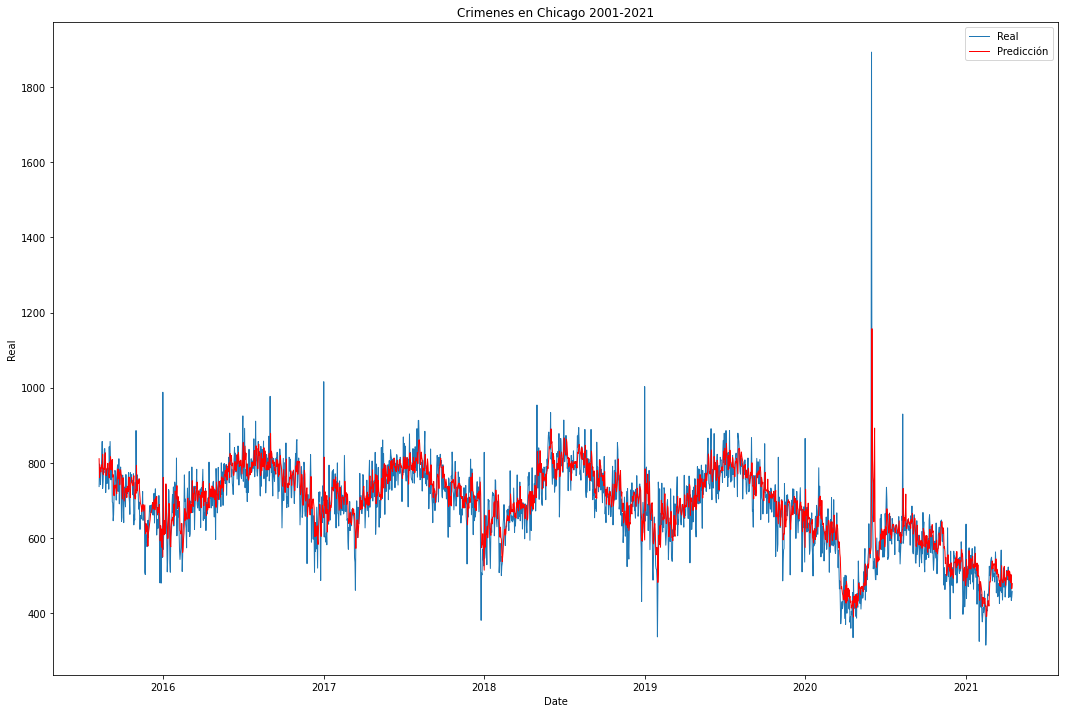

In [19]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):], y=df_comparation["Real"][int(X.shape[0]*0.7):], label = "Real" , linewidth = 1, ax = ax)
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):],y=df_comparation["Prediccion"][int(X.shape[0]*0.7):], label = "Predicción" , linewidth = 1, ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [20]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 6905.051132351429
r^2 = 0.9049237402066969


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

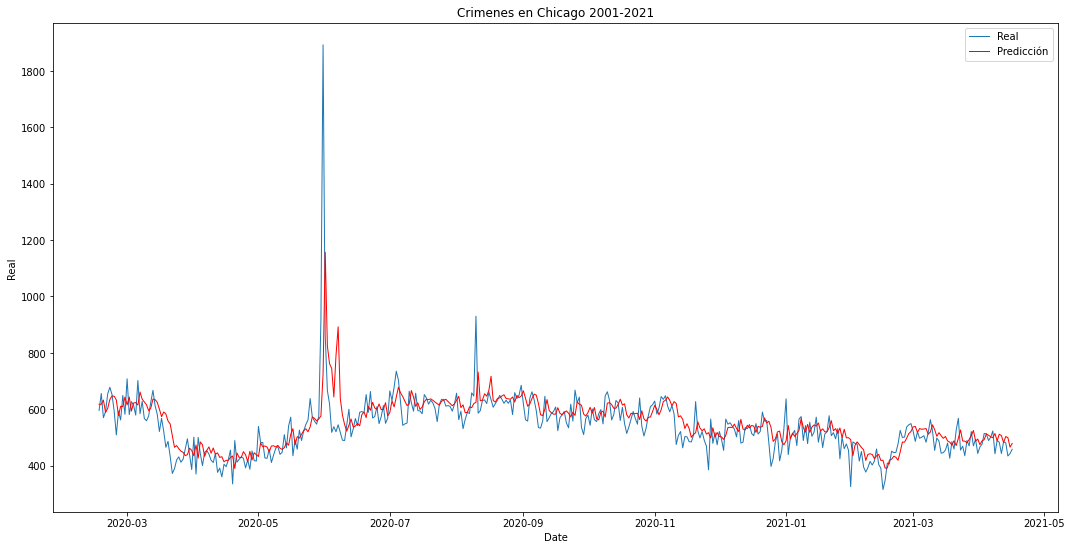

In [21]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][6500:], y=df_comparation["Real"][6500:], linewidth = 1, label = "Real" , ax = ax)
sns.lineplot(x=df_comparation["Date"][6500:],y=df_comparation["Prediccion"][6500:], linewidth = 1, label = "Predicción" , ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [24]:
index = int(X.shape[0]*0.7)
X_f = X[index:index+1]
X_f

array([[806, 722, 745, 753, 793, 815, 837]])

In [27]:
X_test[0]

array([806, 722, 745, 753, 793, 815, 837])

In [23]:
y_lm_7_prediction = lin_model.predict(X_test)
y_lm_7_prediction.shape, X_test.shape

((2078,), (2078, 7))

In [39]:
get_metrics(y_lm_7_prediction, Y_test)

MSE = 4148.874877849269
r^2 = 0.5635582379808834


In [52]:
ts_crime[int(X.shape[0]*0.7)+7:-1]

,Date,Total_Crimes
4854,2015-08-09,737
4855,2015-08-10,797
4856,2015-08-11,778
4857,2015-08-12,742
4858,2015-08-13,769
...,...,...
6927,2021-04-12,484
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443


In [51]:
Y_test

array([737, 797, 778, ..., 434, 443, 458])

In [54]:
df_comparation = pd.DataFrame({"Date" : ts_crime["Date"][int(X.shape[0]*0.7)+7:-1],
                              "Real" : Y_test,
                              "Prediccion" : y_lm_7_prediction})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

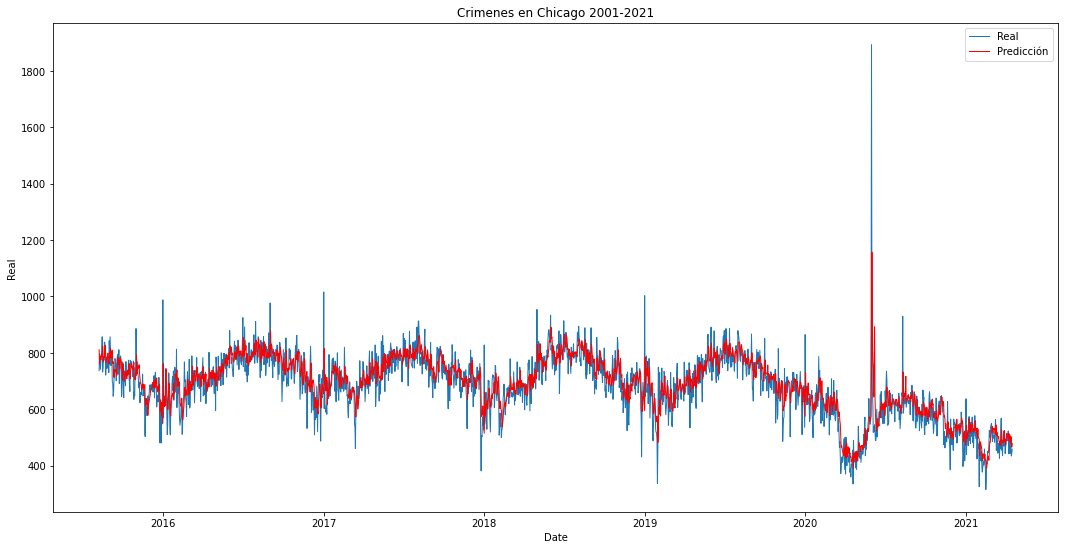

In [55]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [28]:
len(X_test)

2078

In [29]:
Y_f = []

In [30]:
for i in range (len(X_test)):
  pred = lin_model.predict(X_f[-1].reshape(1,-1))[0]
  Y_f.append(pred)
  x_tmp = list(X_f[-1][1:])
  x_tmp.append(pred)
  X_f = np.append(X_f,[x_tmp], axis=0)
  #X_f.append(x_tmp)


In [31]:
len (Y_f)

2078

In [36]:
y_lm_7_forecasting = np.array(Y_f)

In [58]:
df_comparation = pd.DataFrame({"Date" : df_comparation["Date"],
                              "Real" : Y_test,
                              "Prediccion" : Y_f})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

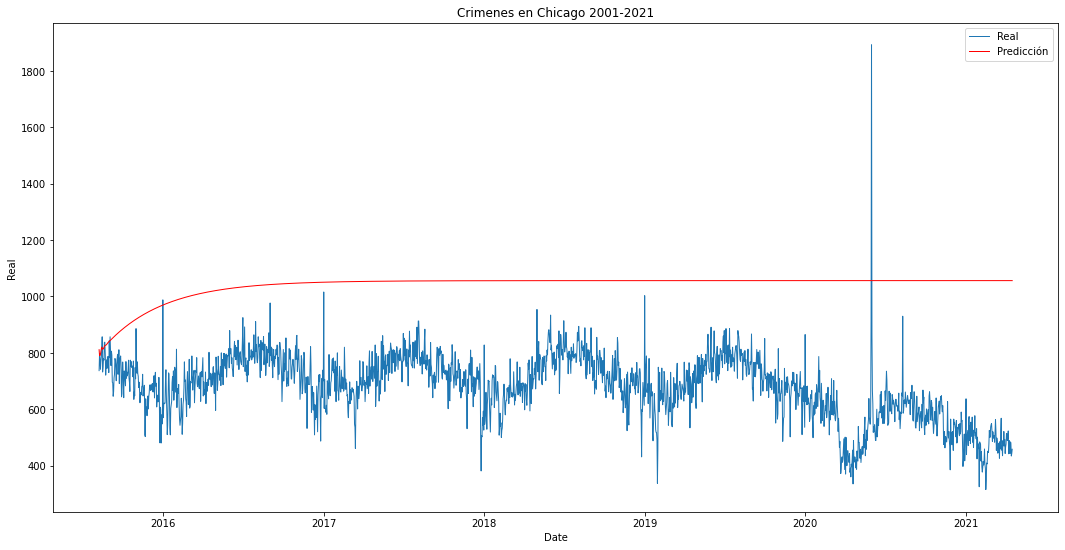

In [59]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [60]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 145588.41565111658
r^2 = -10.360105168827719


### Instancia 2:
**Parámetros**
* Elementos por muestra : 14

In [61]:
X, Y = transformarSerieADataset(ts_crime["Total_Crimes"].to_numpy(), elementosPorMuestra = 14)

In [62]:
print(X.shape)
print(Y.shape)

(6918, 14)
(6918,)


In [63]:
Y[:14]

array([1366, 1492, 1235, 1153, 1383, 1429, 1507, 1244, 1396, 1352, 1232,
       1351, 1357, 1302])

In [64]:
Y[-14:]

array([514, 513, 489, 500, 523, 442, 489, 483, 443, 484, 481, 434, 443,
       458])

In [65]:
n = 14
start = n
end = ts_crime.shape[0] - 1
(start, end)

(14, 6932)

In [66]:
ts_crime[start:end]

,Date,Total_Crimes
14,2002-05-09,1366
15,2002-05-10,1492
16,2002-05-11,1235
17,2002-05-12,1153
18,2002-05-13,1383
...,...,...
6927,2021-04-12,484
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443


In [67]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [68]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4842, 14)
(2076, 14)
(4842,)
(2076,)


In [69]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
def get_metrics (real, prediction):
  MSE = (mean_squared_error(real, prediction))
  print("MSE = "+str(MSE))

  r2 = (r2_score(real, prediction))
  print("r^2 = "+str(r2))

In [71]:
Y_predicted = lin_model.predict(X)
df_comparation = pd.DataFrame({"Date":ts_crime["Date"][14:-1],
                               "Real":Y,
                               "Prediccion":Y_predicted})
df_comparation.shape

(6918, 3)

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021 LR 2')

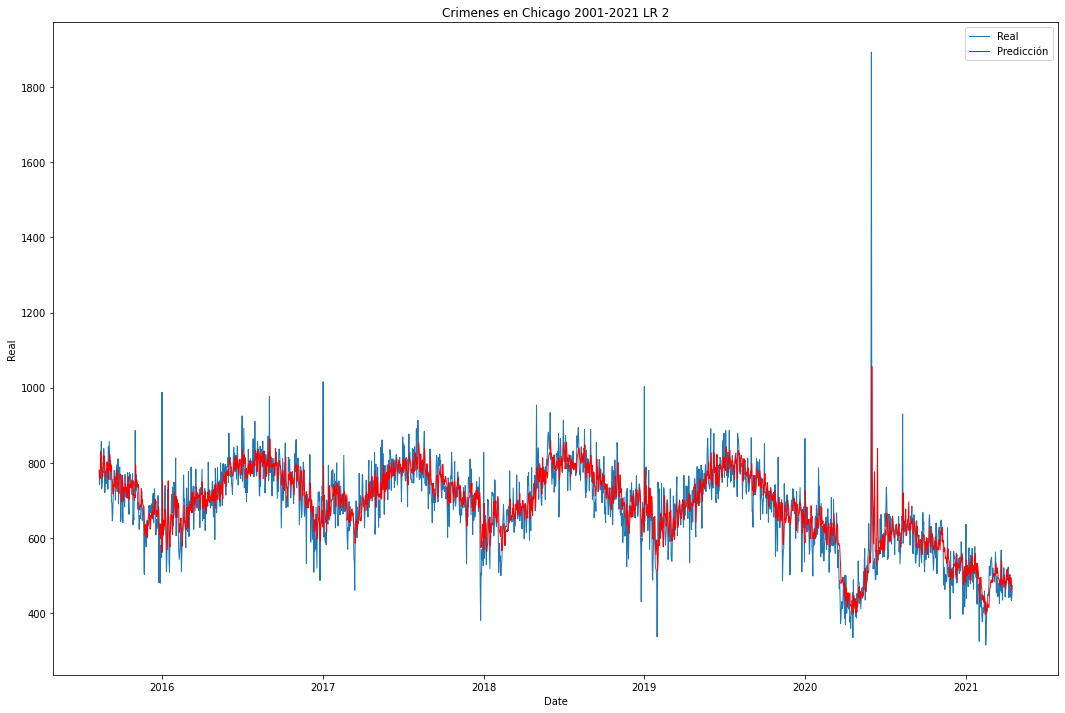

In [72]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):], y=df_comparation["Real"][int(X.shape[0]*0.7):], label = "Real" , linewidth = 1, ax = ax)
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):],y=df_comparation["Prediccion"][int(X.shape[0]*0.7):], label = "Predicción" , linewidth = 1, ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021 LR 2")

In [73]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 6467.466594361253
r^2 = 0.9109044227206193


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

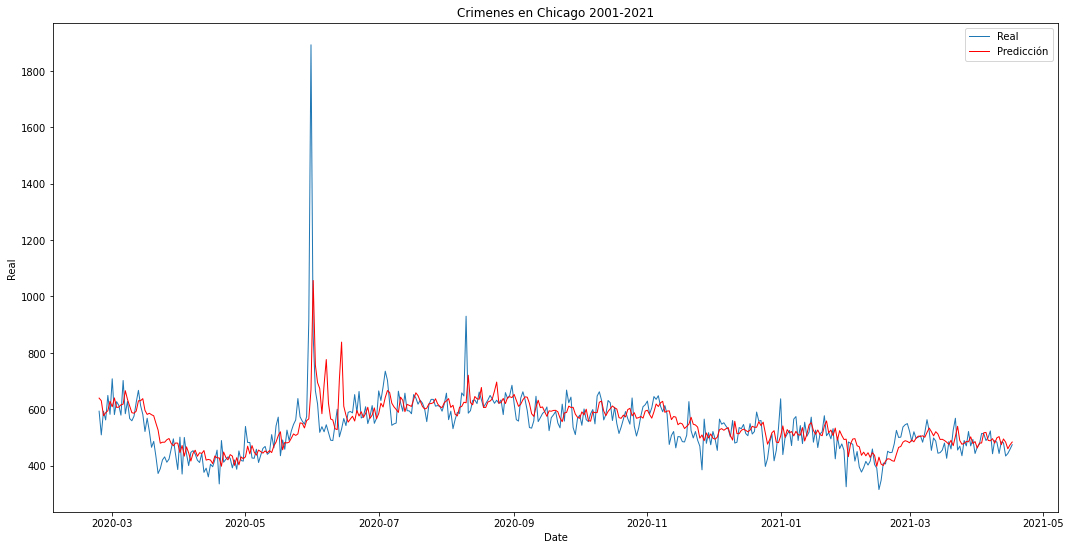

In [42]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][6500:], y=df_comparation["Real"][6500:], linewidth = 1, label = "Real" , ax = ax)
sns.lineplot(x=df_comparation["Date"][6500:],y=df_comparation["Prediccion"][6500:], linewidth = 1, label = "Predicción" , ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [75]:
y_lm_14_prediction = lin_model.predict(X_test)
y_lm_14_prediction.shape, X_test.shape

((2076,), (2076, 14))

In [77]:
get_metrics(y_lm_14_prediction, Y_test)

MSE = 4028.513109098266
r^2 = 0.5680354067848832


In [78]:
y_lm_14_prediction.shape, y_lm_7_prediction.shape

((2076,), (2078,))

In [76]:
index = int(X.shape[0]*0.7)
X_f = X[index:index+1]
X_f

array([[755, 748, 752, 760, 959, 806, 722, 745, 753, 793, 815, 837, 737,
        797]])

In [79]:
df_comparation = pd.DataFrame({"Date" : ts_crime["Date"][int(X.shape[0]*0.7)+14:-1],
                              "Real" : Y_test,
                              "Prediccion" : y_lm_14_prediction})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

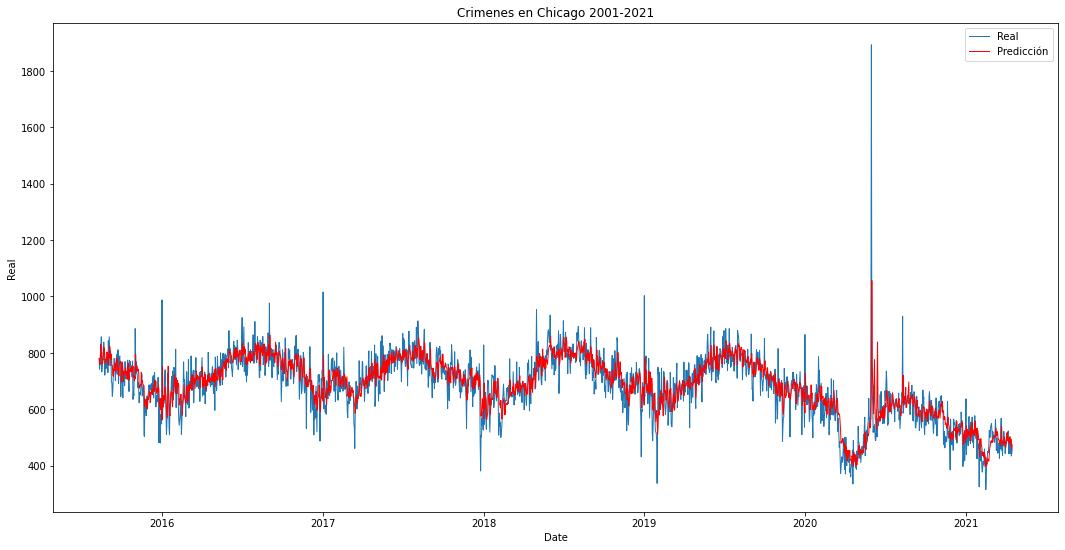

In [80]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [81]:
Y_f = []

In [82]:
for i in range (len(X_test)):
  pred = lin_model.predict(X_f[-1].reshape(1,-1))[0]
  Y_f.append(pred)
  x_tmp = list(X_f[-1][1:])
  x_tmp.append(pred)
  X_f = np.append(X_f,[x_tmp], axis=0)
  #X_f.append(x_tmp)

In [83]:
y_lm_14_forecasting = np.array(Y_f)

In [84]:
df_comparation = pd.DataFrame({"Date" : ts_crime["Date"][int(X.shape[0]*0.7)+14:-1],
                              "Real" : Y_test,
                              "Prediccion" : y_lm_14_forecasting})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

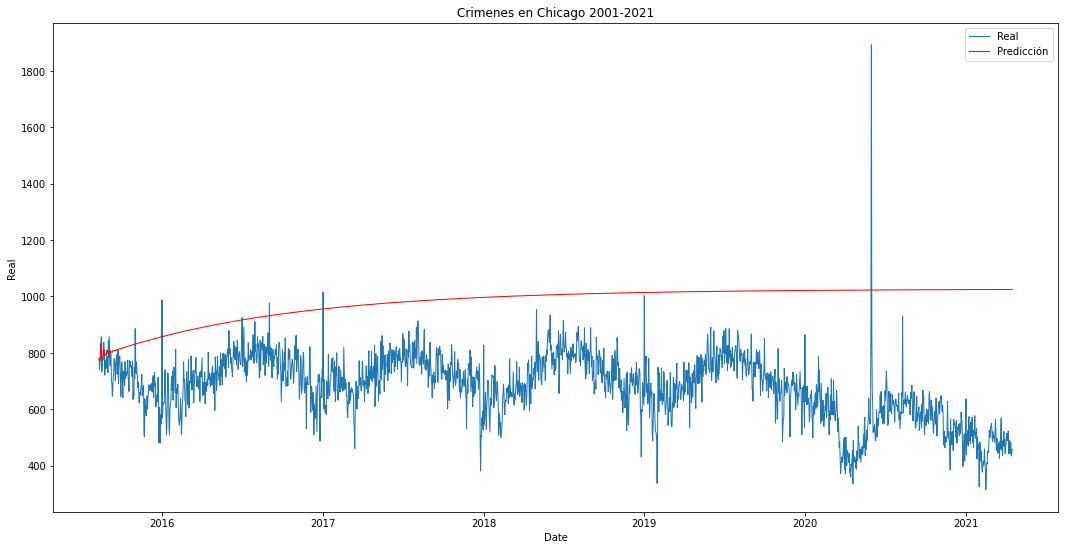

In [85]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [86]:
get_metrics(y_lm_14_forecasting, Y_test)

MSE = 109249.23144584989
r^2 = -30.66459700193283


## Modelo LSTM

In [87]:
# Librerias para el modelo LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model

import time
from sklearn.preprocessing import MinMaxScaler

### Instancia 1:
**Parámetros**
* Elementos por muestra : 30
* Capas ocultas: 3 (50,50,50)
* Optimizador : adam
* loss = mean squared error

In [88]:
ts_crime.head()

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447


In [89]:
# Scale features
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(ts_crime[["Total_Crimes"]])

# Scale predicted value
s2 = MinMaxScaler(feature_range=(0,1))
Ys = s2.fit_transform(ts_crime[["Total_Crimes"]])

In [90]:
# Each time step uses last 'window' to predict the next change
window = 30
X = []
Y = []
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

# Reshape data to format accepted by LSTM
X, Y = np.array(X), np.array(Y)

In [91]:
X.shape

(6903, 30, 1)

In [92]:
train = ts_crime[:int(X.shape[0]*0.7)]
test = ts_crime[int(X.shape[0]*0.7):]

In [93]:
train.shape

(4832, 2)

In [94]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [95]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4832, 30, 1)
(2071, 30, 1)
(4832, 1)
(2071, 1)


In [96]:
(X.shape[1],X.shape[2])

(30, 1)

In [97]:
# create and train LSTM model

# Initialize LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, \
          input_shape=((X.shape[1],X.shape[2])))) #(30,1)
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error',\
              metrics = ['accuracy'])

In [98]:
# Allow for early exit
es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

# Fit (and time) LSTM model
t0 = time.time()
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 250, callbacks=[es], verbose=1)
t1 = time.time()
print('Runtime: %.2f s' %(t1-t0))

Epoch 1/10
20/20 [==============================] - 28s 157ms/step - loss: 0.1204 - accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 3s 156ms/step - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 3s 154ms/step - loss: 0.0091 - accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 3s 155ms/step - loss: 0.0074 - accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 3s 151ms/step - loss: 0.0070 - accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 3s 153ms/step - loss: 0.0065 - accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 3s 153ms/step - loss: 0.0064 - accuracy: 0.0000e+00
Epoch 8/10
20/20 [==============================] - 3s 152ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 9/10
20/20 [==============================] - 3s 152ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 10/10
20/20 [==============================] - 3s 152ms/s

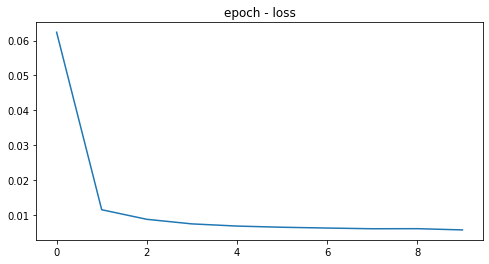

In [99]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
sns.lineplot(data = history.history['loss'], ax = ax)
ax.set_title("epoch - loss");

In [100]:
# Verify the fit of the model
Yp = model.predict(X_train)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_train)

In [101]:
print(Yu.shape)
print(Ym.shape)

(4832, 1)
(4832, 1)


In [102]:
train["Date"].shape

(4832,)

In [103]:
Ym = Ym[:,0]
Yu = Yu[:,0]

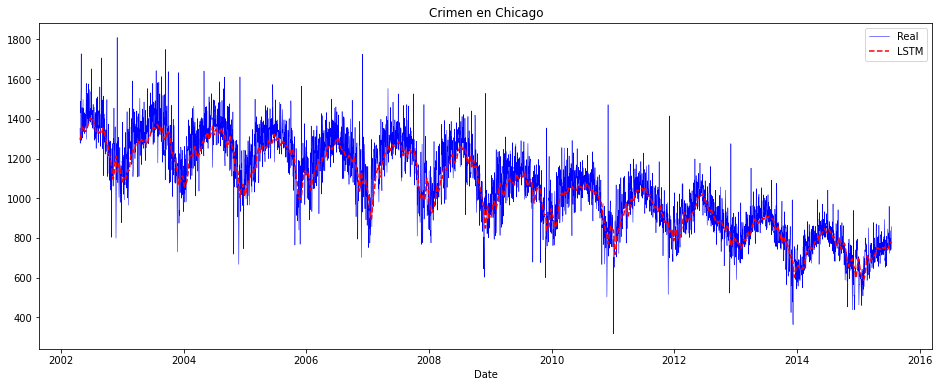

In [104]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = train["Date"], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
sns.lineplot(x = train["Date"], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
ax.set_title("Crimen en Chicago");

In [105]:
get_metrics(Ym, Yu)

MSE = 10156.89628272042
r^2 = 0.8052773938717591


In [106]:
# Verify the fit of the model
Yp = model.predict(X_test)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_test)

In [107]:
Ym = Ym[:,0]
Yu = Yu[:,0]

In [108]:
Yu.shape

(2071,)

In [109]:
get_metrics(Ym, Yu)

MSE = 4989.955281897773
r^2 = 0.6111399735680266


In [110]:
y_lstm_30_prediction = Yu

In [111]:
print(Yu.shape)
print(Ym.shape)

(2071,)
(2071,)


In [112]:
test["Date"][window:].shape

(2071,)

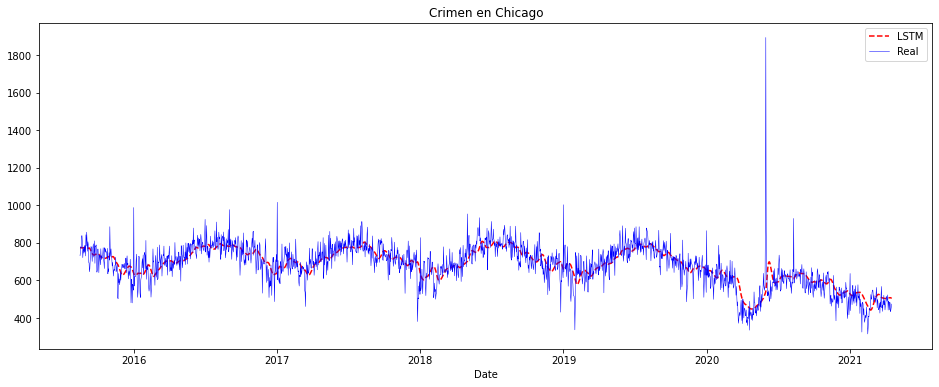

In [113]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [114]:
X_test.shape

(2071, 30, 1)

In [115]:
X_test[0].shape

(30, 1)

In [116]:
X_f = X_test[-1:]
X_f.shape

(1, 30, 1)

In [117]:
X_f[-1].shape

(30, 1)

In [118]:
pred = model.predict(X_f[-1:])[0]
pred

array([0.11990146], dtype=float32)

In [119]:
x_tmp = X_f[-1][1:]
x_tmp = np.append(x_tmp, pred).reshape(-1,1)
X_f = np.append(X_f,[x_tmp], axis=0)

In [120]:
X_f.shape

(2, 30, 1)

In [121]:
X_f = X_test[-1:]
Y_f = []
for _ in range(len(X_test)):
  pred = model.predict(X_f[-1:])[0]
  Y_f.append(pred[0])
  x_tmp = X_f[-1][1:]
  x_tmp = np.append(x_tmp, pred).reshape(-1,1)
  X_f = np.append(X_f,[x_tmp], axis=0)

In [122]:
Yu = s2.inverse_transform(np.array(Y_f).reshape(-1,1))

In [123]:
Yu.shape

(2071, 1)

In [124]:
Yu = Yu[:,0]

In [126]:
Ym = s2.inverse_transform(Y_test)
Ym = Ym[:,0]

In [127]:
y_lstm_30_forecasting = Yu

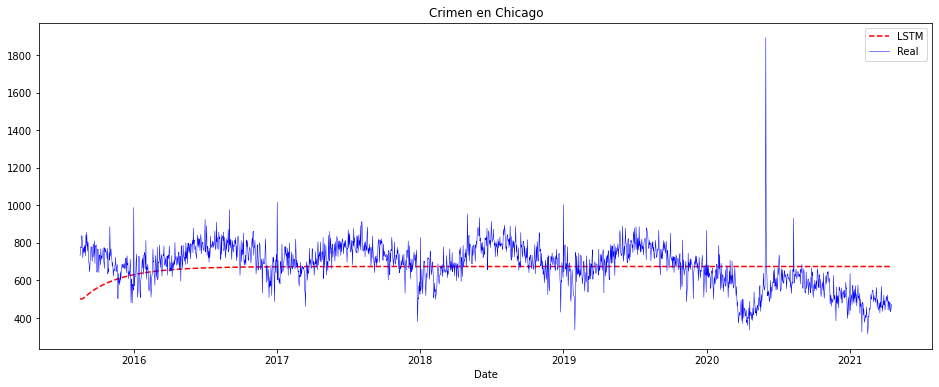

In [128]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [133]:
get_metrics(Ym, y_lstm_30_forecasting)

MSE = 14349.135844490549
r^2 = -0.11820748454532604


### Instancia 2:
**Parámetros**
* Elementos por muestra : 60
* Capas ocultas: 3 (50,50,50)
* Optimizador : adam
* loss = mean squared error

In [129]:
ts_crime.head()

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447


In [130]:
# Scale features
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(ts_crime[["Total_Crimes"]])

# Scale predicted value
s2 = MinMaxScaler(feature_range=(0,1))
Ys = s2.fit_transform(ts_crime[["Total_Crimes"]])

In [131]:
# Each time step uses last 'window' to predict the next change
window = 60
X = []
Y = []
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

# Reshape data to format accepted by LSTM
X, Y = np.array(X), np.array(Y)

In [134]:
X.shape

(6873, 60, 1)

In [135]:
train = ts_crime[:int(X.shape[0]*0.7)]
test = ts_crime[int(X.shape[0]*0.7):]

In [136]:
train.shape

(4811, 2)

In [137]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [138]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4811, 60, 1)
(2062, 60, 1)
(4811, 1)
(2062, 1)


In [139]:
(X.shape[1],X.shape[2])

(60, 1)

In [140]:
# create and train LSTM model

# Initialize LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, \
          input_shape=((X.shape[1],X.shape[2])))) #(60,1)
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error',\
              metrics = ['accuracy'])

In [141]:
# Allow for early exit
es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

# Fit (and time) LSTM model
t0 = time.time()
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 250, callbacks=[es], verbose=1)
t1 = time.time()
print('Runtime: %.2f s' %(t1-t0))

Epoch 1/10
20/20 [==============================] - 13s 293ms/step - loss: 0.1202 - accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 6s 289ms/step - loss: 0.0108 - accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 6s 303ms/step - loss: 0.0078 - accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 6s 290ms/step - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 6s 295ms/step - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 6s 297ms/step - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 6s 298ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 8/10
20/20 [==============================] - 6s 292ms/step - loss: 0.0059 - accuracy: 0.0000e+00
Epoch 9/10
20/20 [==============================] - 6s 290ms/step - loss: 0.0058 - accuracy: 0.0000e+00
Epoch 10/10
20/20 [==============================] - 6s 292ms/s

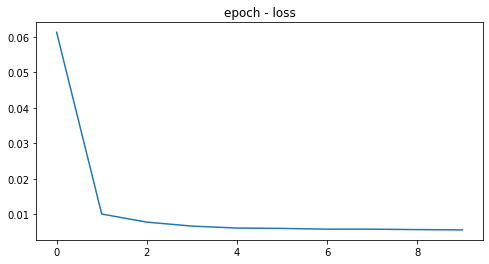

In [142]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
sns.lineplot(data = history.history['loss'], ax = ax)
ax.set_title("epoch - loss");

In [143]:
# Verify the fit of the model
Yp = model.predict(X_train)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_train)

In [146]:
print(Yu.shape)
print(Ym.shape)

(4811, 1)
(4811, 1)


In [145]:
train["Date"].shape

(4811,)

In [147]:
Ym = Ym[:,0]
Yu = Yu[:,0]

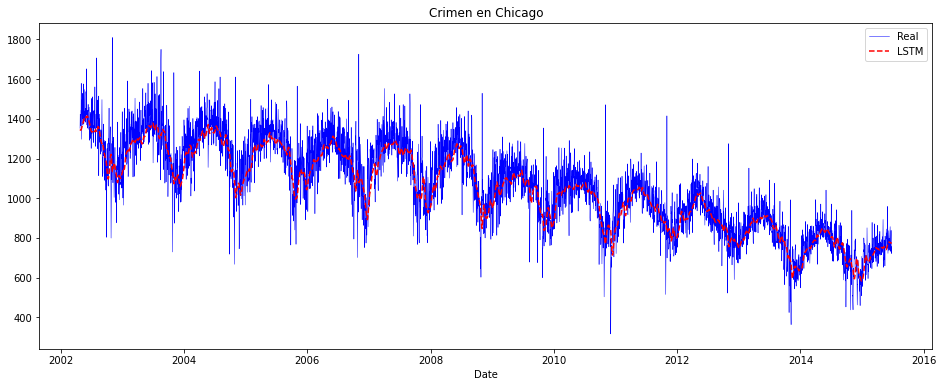

In [148]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = train["Date"], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
sns.lineplot(x = train["Date"], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
ax.set_title("Crimen en Chicago");

In [149]:
get_metrics(Ym, Yu)

MSE = 9892.393773978576
r^2 = 0.8091450235892386


In [150]:
# Verify the fit of the model
Yp = model.predict(X_test)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_test)

In [151]:
Yu.shape

(2062, 1)

In [152]:
get_metrics(Ym, Yu)

MSE = 4990.25701270118
r^2 = 0.6113645148533098


In [153]:
Ym = Ym[:,0]
Yu = Yu[:,0]

In [154]:
y_lstm_60_prediction = Yu

In [155]:
print(Yu.shape)
print(Ym.shape)

(2062,)
(2062,)


In [156]:
test["Date"][window:].shape

(2062,)

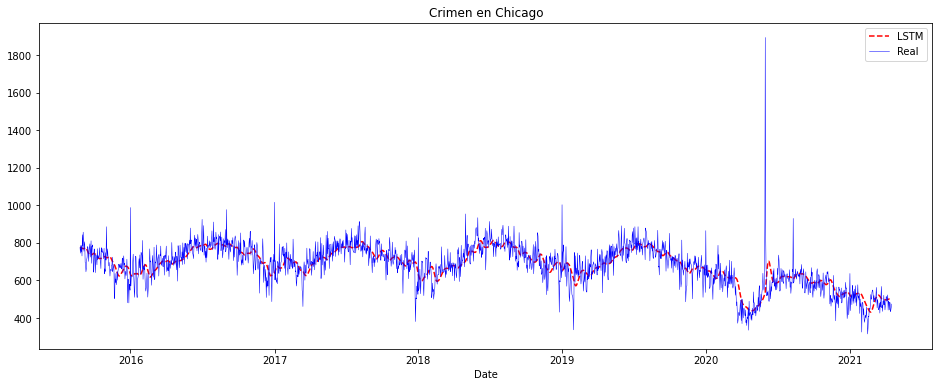

In [157]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [158]:
X_test.shape

(2062, 60, 1)

In [159]:
X_test[0].shape

(60, 1)

In [160]:
X_f = X_test[-1:]
X_f.shape

(1, 60, 1)

In [161]:
X_f[-1].shape

(60, 1)

In [162]:
pred = model.predict(X_f[-1:])[0]
pred

array([0.11570784], dtype=float32)

In [163]:
x_tmp = X_f[-1][1:]
x_tmp = np.append(x_tmp, pred).reshape(-1,1)
X_f = np.append(X_f,[x_tmp], axis=0)

In [164]:
X_f.shape

(2, 60, 1)

In [165]:
X_f = X_test[-1:]
Y_f = []
for _ in range(len(X_test)):
  pred = model.predict(X_f[-1:])[0]
  Y_f.append(pred[0])
  x_tmp = X_f[-1][1:]
  x_tmp = np.append(x_tmp, pred).reshape(-1,1)
  X_f = np.append(X_f,[x_tmp], axis=0)

In [166]:
Yu = s2.inverse_transform(np.array(Y_f).reshape(-1,1))

In [167]:
Yu.shape

(2062, 1)

In [168]:
Yu = Yu[:,0]
Yu.shape

(2062,)

In [169]:
Ym.shape

(2062,)

In [170]:
y_lstm_60_forecasting = Yu

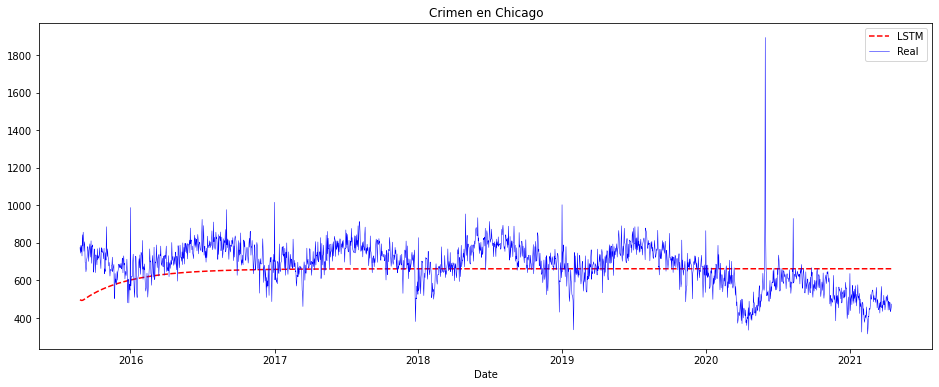

In [171]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [172]:
get_metrics(Ym, y_lstm_60_forecasting)

MSE = 14997.46626560912
r^2 = -0.16798544910038227


## Prophet

In [173]:
# Importamos Prophet
from fbprophet import Prophet

In [175]:
# Tenemos una data frame de cada fecha en que se cometio un crimen en Chicago
# dese 2002 a 2021
df_pr = ts_crime.copy()
df_pr

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447
...,...,...
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458


In [176]:
# Prophet necesita un formato muy epscifico para utilizar su libreria
# Asi que nombraremos las fechas con Date = "ds" y Total_Crimenes = "y"
df_pr.columns = ['ds', 'y']
df_pr

,ds,y
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447
...,...,...
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458


In [226]:
# Dividimos nuestros datos en train y tes
train_data_pr = df_pr[:len(ts_crime)-100]
test_data_pr = df_pr[:len(ts_crime)-12:]

In [227]:
print (train_data_pr.shape)
print (test_data_pr.shape)

(6833, 2)
(6921, 2)


In [228]:
ts_crime.tail()

,Date,Total_Crimes
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458
6932,2021-04-17,474


In [229]:
train_data_pr.tail()

,ds,y
6828,2021-01-03,498
6829,2021-01-04,512
6830,2021-01-05,525
6831,2021-01-06,471
6832,2021-01-07,565


In [230]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=100)
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
6928,2021-04-13,575.382052,448.696756,669.489990,575.033955,575.864478,-19.382060,-19.382060,-19.382060,-0.065312,-0.065312,-0.065312,-19.316749,-19.316749,-19.316749,0.0,0.0,0.0,555.999991
6929,2021-04-14,575.259605,460.494135,682.000933,574.891691,575.760796,-11.096843,-11.096843,-11.096843,6.903962,6.903962,6.903962,-18.000806,-18.000806,-18.000806,0.0,0.0,0.0,564.162762
6930,2021-04-15,575.137158,443.158496,666.641702,574.749562,575.676391,-20.009341,-20.009341,-20.009341,-3.460758,-3.460758,-3.460758,-16.548584,-16.548584,-16.548584,0.0,0.0,0.0,555.127817
6931,2021-04-16,575.014712,501.901877,725.777477,574.618969,575.575724,36.543434,36.543434,36.543434,51.512577,51.512577,51.512577,-14.969142,-14.969142,-14.969142,0.0,0.0,0.0,611.558146
6932,2021-04-17,574.892265,453.815063,674.403118,574.485211,575.466564,-10.634557,-10.634557,-10.634557,2.639238,2.639238,2.639238,-13.273796,-13.273796,-13.273796,0.0,0.0,0.0,564.257708


In [231]:
test_data = prophet_pred[["ds", "yhat"]][-100:]
test_data

,ds,yhat
6833,2021-01-08,539.788182
6834,2021-01-09,492.513785
6835,2021-01-10,445.831530
6836,2021-01-11,480.378049
6837,2021-01-12,493.291764
...,...,...
6928,2021-04-13,555.999991
6929,2021-04-14,564.162762
6930,2021-04-15,555.127817
6931,2021-04-16,611.558146


In [232]:
test_data["Real"] = ts_crime["Total_Crimes"][-100:]

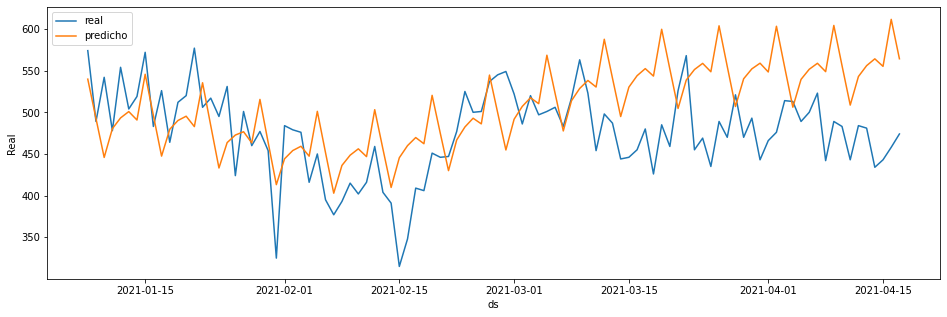

In [233]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data['ds'], y=test_data["Real"], label = "real")
sns.lineplot(x=test_data['ds'], y = test_data["yhat"], label= "predicho");

In [234]:
test_data = prophet_pred[["ds", "yhat"]]
test_data["Real"] = ts_crime["Total_Crimes"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



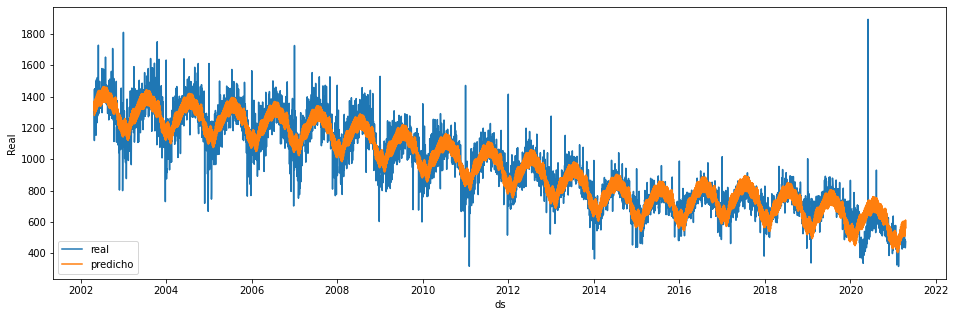

In [235]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data['ds'], y=test_data["Real"], label = "real")
sns.lineplot(x=test_data['ds'], y = test_data["yhat"], label= "predicho");

In [236]:
y_prophet_forecasting = test_data["yhat"][-100:]

In [237]:
get_metrics(test_data["Real"][-100:], test_data["yhat"][-100:])

MSE = 4250.698384536354
r^2 = -0.6479407554223284


## SARIMAX

In [204]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 4.0MB/s 
     |████████████████████████████████| 9.5MB 15.8MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [205]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima    

In [207]:
df_ar = ts_crime.copy()
df_ar = df_ar.set_index("Date")

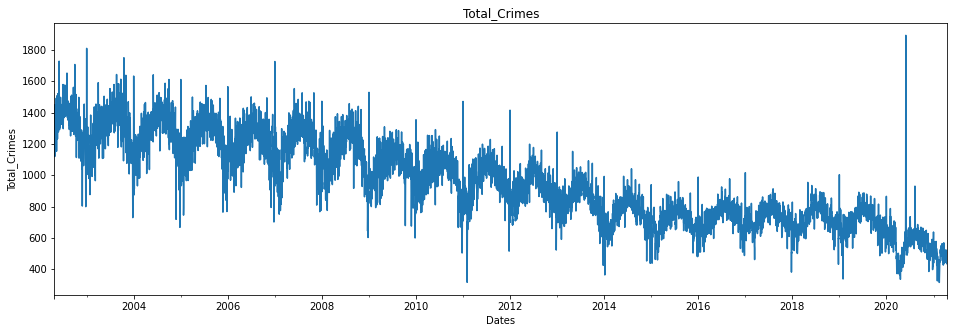

In [208]:
df_ar.index.freq = "D"
ax = df_ar['Total_Crimes'].plot(figsize = (16,5), title = "Total_Crimes")
ax.set(xlabel='Dates', ylabel='Total_Crimes');

<Figure size 1152x432 with 0 Axes>

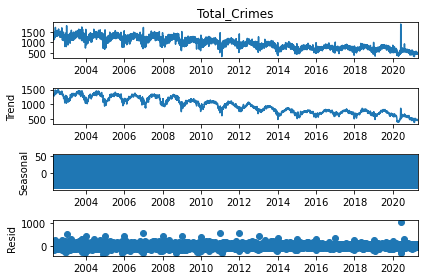

In [220]:
a = seasonal_decompose(df_ar["Total_Crimes"], model = "add")
fig = plt.figure(figsize=(16,6))
a.plot();

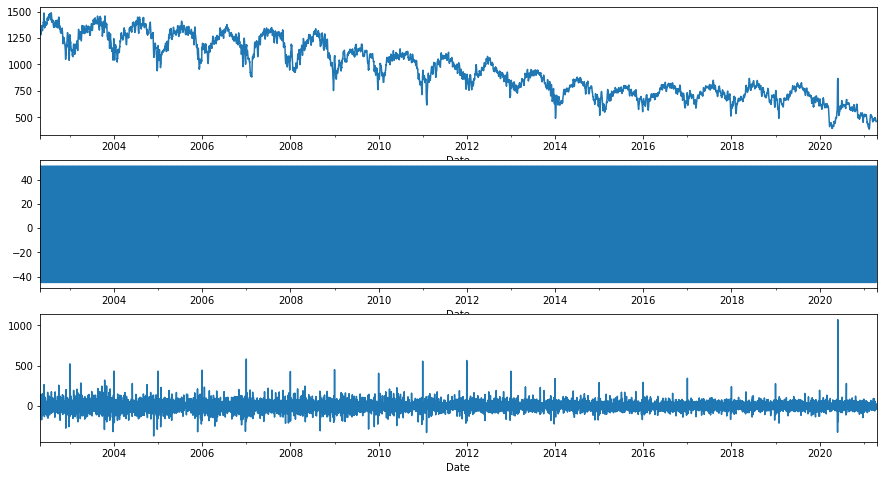

In [224]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
a.trend.plot(ax=ax1)
a.resid.plot(ax=ax3)
a.seasonal.plot(ax=ax2)

In [225]:
auto_arima(df_ar['Total_Crimes'], seasonal=True, frequency=365).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6933
Model:               SARIMAX(0, 1, 3)   Log Likelihood              -40445.754
Date:                Tue, 22 Jun 2021   AIC                          80899.508
Time:                        22:46:50   BIC                          80926.884
Sample:                             0   HQIC                         80908.946
                               - 6933                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6236      0.007    -84.266      0.000      -0.638      -0.609
ma.L2         -0.1897      0.012    -15.220      0.000      -0.214      -0.165
ma.L3         -0.0537      0.011     -4.754      0.000      -0.076      -0.032
sigma2      6844.6447     45.546    150.280      0.000    6755.377    6933.913
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             45358.77
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             0.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [238]:
train_data = df_ar[:-100]
test_data = df_ar[-100:]
arima_model = SARIMAX(train_data['Total_Crimes'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                               Total_Crimes   No. Observations:                 6833
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood              -39727.027
Date:                                    Tue, 22 Jun 2021   AIC                          79476.055
Time:                                            22:54:23   BIC                          79551.178
Sample:                                        04-25-2002   HQIC                         79501.972
                                             - 01-07-2021                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3003      0.010     28.894      0.000       0.280       0.321
ar.L2          0.0225      0.013      1.735      0.083      -0.003       0.048
ma.L1         -0.9042      0.006   -139.524      0.000      -0.917      -0.891
ar.S.L12      -0.8332      0.019    -43.609      0.000      -0.871      -0.796
ar.S.L24       0.7589      0.028     27.194      0.000       0.704       0.814
ar.S.L36       0.9863      0.020     49.423      0.000       0.947       1.025
ar.S.L48       0.0150      0.013      1.117      0.264      -0.011       0.041
ma.S.L12       0.8069      0.013     60.316      0.000       0.781       0.833
ma.S.L24      -0.7879      0.022    -35.316      0.000      -0.832      -0.744
ma.S.L36      -0.9686      0.013    -73.609      0.000      -0.994      -0.943
sigma2      7094.9513     51.734    137.143      0.000    6993.554    7196.348
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):             51800.14
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                             0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [239]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df_ar)-1, typ="levels").rename("ARIMA Predictions")
len(arima_pred)

100

In [245]:
y_sarimax = arima_pred.values

In [250]:
ts_crime.tail()

,Date,Total_Crimes
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458
6932,2021-04-17,474


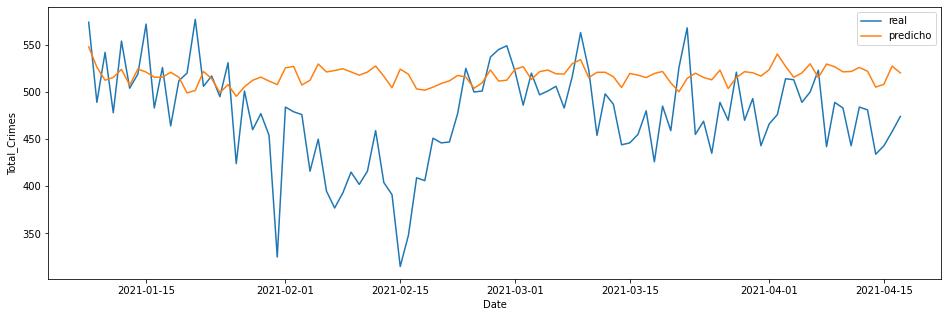

In [251]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= ts_crime["Date"][-100:], y = ts_crime["Total_Crimes"][-100:], label = "real")
sns.lineplot(x=ts_crime["Date"][-100:], y = y_sarimax, label= "predicho");

In [252]:
get_metrics(ts_crime["Total_Crimes"][-100:], y_sarimax)

MSE = 4244.087390480223
r^2 = -0.6453777585796008


In [253]:
test_100 = ts_crime[-100:]

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

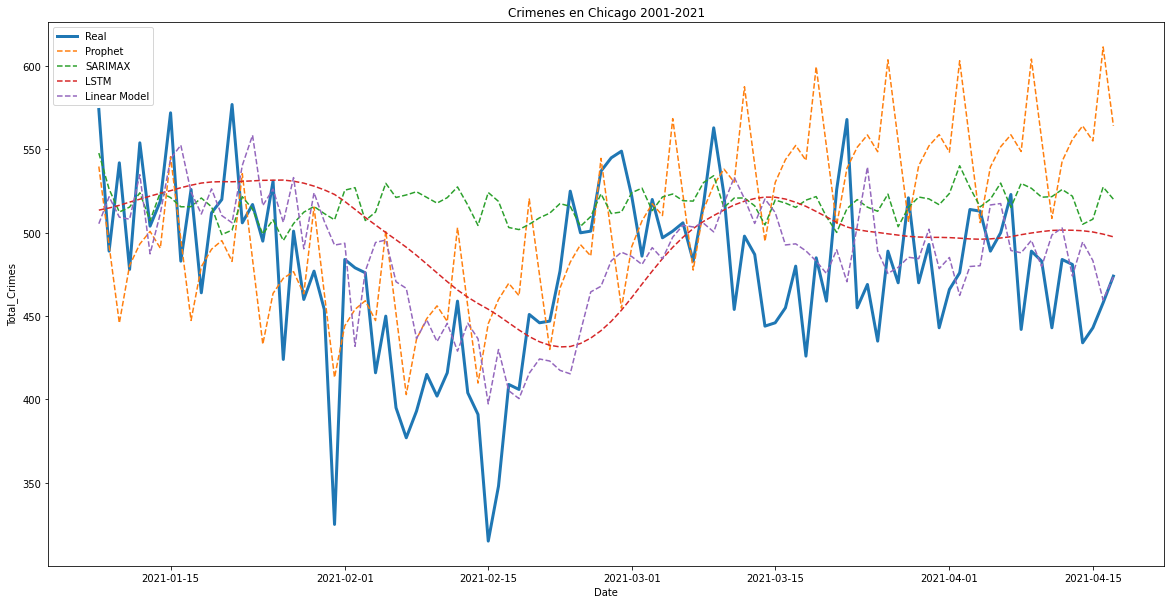

In [263]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
sns.lineplot(x = test_100["Date"], y=test_100["Total_Crimes"], linewidth = 3, label = "Real" ,ax = ax)
sns.lineplot(x = test_100["Date"], y= y_prophet_forecasting, linewidth = 1.5, ls = "--", label = "Prophet" ,ax = ax)
sns.lineplot(x = test_100["Date"], y= y_sarimax, linewidth = 1.5,ls = "--", label = "SARIMAX" ,ax = ax)
sns.lineplot(x = test_100["Date"], y= y_lstm_60_prediction[-100:], linewidth = 1.5,ls = "--", label = "LSTM" ,ax = ax)
sns.lineplot(x = test_100["Date"], y= y_lm_14_prediction[-100:], linewidth = 1.5,ls = "--", label = "Linear Model" ,ax = ax)
ax.set_title("Crimenes en Chicago 2001-2021")